In [1]:
# Imports
import os
import numpy as np
import matplotlib.pyplot as plt
import flopy
import flopy.utils.binaryfile as bf
%matplotlib inline

flopy is installed in C:\ProgramData\Anaconda3\lib\site-packages\flopy


In [2]:
#Set working directory and names
ws = 'D:/Chelsea/Projects/DelawareStream/FloPy/Tutorial02wMT3DMS3'
wspath = 'D:/Chelsea/Projects/DelawareStream/FloPy/Tutorial02wMT3DMS3/'
if not os.path.exists(ws): #make sure workspace directory exists
    os.makedirs(ws)
name = 'Tutorial02wMT3DMS3'
modelname = 'Tutorial02wMT3DMS3'
exe_name_mf = os.path.abspath('D:/Chelsea/Projects/DelawareStream/Script/Executables/mf2005')
exe_name_mt = os.path.abspath('D:/Chelsea/Projects/DelawareStream/Script/Executables/mt3dms')

In [ ]:
#def p10(dirname, mixelm, perlen=1000, isothm=1, sp2=0., ttsmult=1.2):
perlen=1000
isothm=1
sp2=0.
ttsmult=1.2
mixelm = -1
model_ws = ws #os.path.join(workdir, dirname)
nlay = 4
nrow = 61
ncol = 40
delr = [2000, 1600, 800, 400, 200, 100] + 28*[50] + [100, 200, 400, 800, 1600, 2000]
delc = [2000, 2000, 2000, 1600, 800, 400, 200, 100] + 45 * [50] + [100, 200, 400, 800, 1600, 2000, 2000, 2000]
delv = 25.
top = 780.
botm = [top - delv * k for k in range(1, nlay + 1)]
prsity = 0.3
al = 10.
trpt = 0.2
trpv = 0.2

perlen_mf = perlen
perlen_mt = perlen
hk = [60., 60., 520., 520.]
vka = .1
laytyp = 0

modelname_mf = wspath + modelname + '_mf'#dirname + '_mf'
mf = flopy.modflow.Modflow(modelname=modelname_mf, model_ws=model_ws, 
                           exe_name=exe_name_mf)
dis = flopy.modflow.ModflowDis(mf, nlay=nlay, nrow=nrow, ncol=ncol,
                               delr=delr, delc=delc, top=top, 
                               botm=botm,
                               perlen=perlen_mf)
ibound = np.ones((nlay, nrow, ncol), dtype=np.int)
ibound[:, :, 0] = -1
ibound[:, :, -1] = -1

#f = open(os.path.join(datadir, 'p10shead.dat'))
#s0 = np.empty((nrow * ncol), dtype=np.float)
#s0 = read1d(f, s0).reshape((nrow, ncol))
#f.close()
strt = np.zeros((nlay, nrow, ncol), dtype=np.float)
#for k in range(nlay):
   # strt[k] = s0
bas = flopy.modflow.ModflowBas(mf, ibound=ibound, strt=strt)
lpf = flopy.modflow.ModflowLpf(mf, hk=hk, layvka=1, vka=vka, laytyp=laytyp)
welspd = [[3 - 1, 11 - 1, 29 - 1, -19230.00],
          [3 - 1, 19 - 1, 26 - 1, -19230.00],
          [3 - 1, 26 - 1, 23 - 1, -19230.00],
          [3 - 1, 33 - 1, 20 - 1, -19230.00],
          [3 - 1, 40 - 1, 17 - 1, -19230.00],
          [3 - 1, 48 - 1, 14 - 1, -19230.00],
          [3 - 1, 48 - 1,  9 - 1, -15384.00],
          [3 - 1, 52 - 1, 17 - 1, -17307.00]]
wel = flopy.modflow.ModflowWel(mf, stress_period_data=welspd)
rch = flopy.modflow.ModflowRch(mf, rech=1.14e-3)
pcg = flopy.modflow.ModflowPcg(mf)
lmt = flopy.modflow.ModflowLmt(mf)
mf.write_input()
fname = os.path.join(model_ws, 'MT3D001.UCN')
if os.path.isfile(fname):
    os.remove(fname)
mf.run_model(silent=False)

In [15]:
#def p10(dirname, mixelm, perlen=1000, isothm=1, sp2=0., ttsmult=1.2):
perlen=1000
isothm=1
sp2=0.
ttsmult=1.2
mixelm = -1
model_ws = ws #os.path.join(workdir, dirname)
nlay = 4
nrow = 61
ncol = 40
delr = [2000, 1600, 800, 400, 200, 100] + 28*[50] + [100, 200, 400, 800, 1600, 2000]
delc = [2000, 2000, 2000, 1600, 800, 400, 200, 100] + 45 * [50] + [100, 200, 400, 800, 1600, 2000, 2000, 2000]
delv = 25.
top = 780.
botm = [top - delv * k for k in range(1, nlay + 1)]
prsity = 0.3
al = 10.
trpt = 0.2
trpv = 0.2

perlen_mf = perlen
perlen_mt = perlen
hk = [60., 60., 520., 520.]
vka = .1
laytyp = 0

modelname_mf = wspath + modelname + '_mf'#dirname + '_mf'
mf = flopy.modflow.Modflow(modelname=modelname_mf, model_ws=model_ws, 
                           exe_name=exe_name_mf)
dis = flopy.modflow.ModflowDis(mf, nlay=nlay, nrow=nrow, ncol=ncol,
                               delr=delr, delc=delc, top=top, 
                               botm=botm,
                               perlen=perlen_mf)
ibound = np.ones((nlay, nrow, ncol), dtype=np.int)
ibound[:, :, 0] = -1
ibound[:, :, -1] = -1

#f = open(os.path.join(datadir, 'p10shead.dat'))
#s0 = np.empty((nrow * ncol), dtype=np.float)
#s0 = read1d(f, s0).reshape((nrow, ncol))
#f.close()
strt = np.zeros((nlay, nrow, ncol), dtype=np.float)
#for k in range(nlay):
   # strt[k] = s0
bas = flopy.modflow.ModflowBas(mf, ibound=ibound, strt=strt)
lpf = flopy.modflow.ModflowLpf(mf, hk=hk, layvka=1, vka=vka, laytyp=laytyp)
welspd = [[3 - 1, 11 - 1, 29 - 1, -19230.00],
          [3 - 1, 19 - 1, 26 - 1, -19230.00],
          [3 - 1, 26 - 1, 23 - 1, -19230.00],
          [3 - 1, 33 - 1, 20 - 1, -19230.00],
          [3 - 1, 40 - 1, 17 - 1, -19230.00],
          [3 - 1, 48 - 1, 14 - 1, -19230.00],
          [3 - 1, 48 - 1,  9 - 1, -15384.00],
          [3 - 1, 52 - 1, 17 - 1, -17307.00]]
wel = flopy.modflow.ModflowWel(mf, stress_period_data=welspd)
rch = flopy.modflow.ModflowRch(mf, rech=1.14e-3)
pcg = flopy.modflow.ModflowPcg(mf)
lmt = flopy.modflow.ModflowLmt(mf)
mf.write_input()
fname = os.path.join(model_ws, 'MT3D001.UCN')
if os.path.isfile(fname):
    os.remove(fname)
mf.run_model(silent=False)

FloPy is using the following  executable to run the model: D:\Chelsea\Projects\DelawareStream\Script\Executables\mf2005.exe

                                  MODFLOW-2005     
    U.S. GEOLOGICAL SURVEY MODULAR FINITE-DIFFERENCE GROUND-WATER FLOW MODEL
                             Version 1.12.00 2/3/2017                        

 Using NAME file: D:/Chelsea/Projects/DelawareStream/FloPy/Tutorial02wMT3DMS3/Tutorial02wMT3DMS3_mf.nam 
 Run start date and time (yyyy/mm/dd hh:mm:ss): 2019/07/17 17:30:10

 Solving:  Stress period:     1    Time step:     1    Ground-Water Flow Eqn.
 Run end date and time (yyyy/mm/dd hh:mm:ss): 2019/07/17 17:30:10
 Elapsed run time:  0.078 Seconds

  Normal termination of simulation


(True, [])

In [16]:
modelname_mt = wspath + modelname + '_mt'#dirname + '_mt'
mt = flopy.mt3d.Mt3dms(modelname=modelname_mt, model_ws=model_ws, 
                       exe_name=exe_name_mt, modflowmodel=mf)
#f = open(os.path.join(datadir, 'p10cinit.dat'))
c0 = 0. #np.zeros((nrow * ncol), dtype=np.float)
#c0 = read1d(f, c0).reshape((nrow, ncol))
#f.close()
sconc = np.zeros((nlay, nrow, ncol), dtype=np.float)
sconc[1] = 0.2 * c0
sconc[2] = c0
obs = [[3 - 1, 11 - 1, 29 - 1],
       [3 - 1, 19 - 1, 26 - 1],
       [3 - 1, 26 - 1, 23 - 1],
       [3 - 1, 33 - 1, 20 - 1],
       [3 - 1, 40 - 1, 17 - 1],
       [3 - 1, 48 - 1, 14 - 1],
       [3 - 1, 48 - 1,  9 - 1],
       [3 - 1, 52 - 1, 17 - 1]]    
btn = flopy.mt3d.Mt3dBtn(mt, icbund=1, prsity=prsity, sconc=sconc,
                         timprs=[500, 750, 1000], dt0=2.25, ttsmult=ttsmult, 
                         obs=obs)
dceps = 1.e-5
nplane = 0
npl = 0
nph = 16
npmin = 2
npmax = 32
dchmoc = 0.01
nlsink = nplane
npsink = nph
adv = flopy.mt3d.Mt3dAdv(mt, mixelm=mixelm, dceps=dceps, nplane=nplane, 
                         npl=npl, nph=nph, npmin=npmin, npmax=npmax,
                         nlsink=nlsink, npsink=npsink, percel=1.0)
dsp = flopy.mt3d.Mt3dDsp(mt, al=al, trpt=trpt, trpv=trpv)
ssm = flopy.mt3d.Mt3dSsm(mt, crch=0.)
rct = flopy.mt3d.Mt3dRct(mt, isothm=isothm, igetsc=0, rhob=1.7, 
                         sp1=0.176, sp2=sp2)
mxiter = 1
if isothm == 4:
    mxiter = 50
gcg = flopy.mt3d.Mt3dGcg(mt, mxiter=mxiter, iter1=500)
mt.write_input()
fname = os.path.join(model_ws, 'MT3D001.UCN')
if os.path.isfile(fname):
    os.remove(fname)
mt.run_model(silent=False)

FloPy is using the following  executable to run the model: D:\Chelsea\Projects\DelawareStream\Script\Executables\mt3dms.exe
 MT3DMS - Modular 3-D Multi-Species Transport Model [Version 5.30]
 Developed at University of Alabama for U.S. Department of Defense

 STOP. Specified Name file does not exist:  or .na


(False, [])

In [ ]:
fname = os.path.join(model_ws, 'MT3D001.UCN')
ucnobj = flopy.utils.UcnFile(fname)
times = ucnobj.get_times()
conc = ucnobj.get_alldata()

fname = os.path.join(model_ws, 'MT3D001.OBS')
if os.path.isfile(fname):
    cvt = mt.load_obs(fname)
else:
    cvt = None

fname = os.path.join(model_ws, 'MT3D001.MAS')
mvt = mt.load_mas(fname)

#  return mf, mt, conc, cvt, mvt

In [7]:
mf, mt, conctvd, cvttvd, mvttvd = p10('p10', -1)
mf, mt, conchmoc, cvthmoc, mvthmoc = p10('p10', 3)
mf, mt, concupfd, cvtupfd, mvtupfd = p10('p10', 0, ttsmult=1.0)
sr = mf.dis.sr

NameError: name 'workdir' is not defined

NameError: name 'mt' is not defined

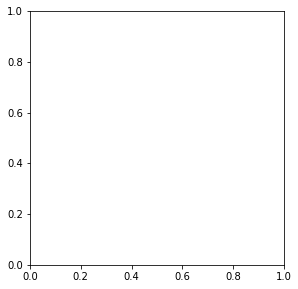

In [5]:
fig = plt.figure(figsize=(10, 15))
ax = fig.add_subplot(2, 2, 1, aspect='equal')
cinit = mt.btn.sconc[0].array[2]
mm = flopy.plot.PlotMapView(model=mf)
mm.plot_grid(color='.5', alpha=0.2)
cs = mm.contour_array(cinit, levels=np.arange(20, 200, 20))
plt.xlim(5100, 5100 + 28 * 50)
plt.ylim(9100, 9100 + 45 * 50)
plt.xlabel('DISTANCE ALONG X-AXIS, IN METERS')
plt.ylabel('DISTANCE ALONG Y-AXIS, IN METERS')
plt.title('LAYER {} INITIAL CONCENTRATION'.format(3))
for k, i, j, q in mf.wel.stress_period_data[0]:
    plt.plot(sr.xcenter[j], sr.ycenter[i], 'ks')

ax = fig.add_subplot(2, 2, 2, aspect='equal')
c = conctvd[0, 2]
chmoc = conchmoc[0, 2]
mm = flopy.plot.PlotMapView(model=mf)
mm.plot_grid(color='.5', alpha=0.2)
cs = mm.contour_array(c, levels=np.arange(20, 200, 20))
cs = mm.contour_array(chmoc, linestyles=':', levels=np.arange(20, 200, 20))
plt.xlim(5100, 5100 + 28 * 50)
plt.ylim(9100, 9100 + 45 * 50)
plt.xlabel('DISTANCE ALONG X-AXIS, IN METERS')
plt.ylabel('DISTANCE ALONG Y-AXIS, IN METERS')
plt.title('LAYER {} TIME = 500 DAYS'.format(3))
for k, i, j, q in mf.wel.stress_period_data[0]:
    plt.plot(sr.xcenter[j], sr.ycenter[i], 'ks')

ax = fig.add_subplot(2, 2, 3, aspect='equal')
c = conctvd[1, 2]
chmoc = conchmoc[1, 2]
mm = flopy.plot.PlotMapView(model=mf)
mm.plot_grid(color='.5', alpha=0.2)
cs = mm.contour_array(c, levels=np.arange(20, 200, 20))
cs = mm.contour_array(chmoc, linestyles=':', levels=np.arange(20, 200, 20))
plt.xlim(5100, 5100 + 28 * 50)
plt.ylim(9100, 9100 + 45 * 50)
plt.xlabel('DISTANCE ALONG X-AXIS, IN METERS')
plt.ylabel('DISTANCE ALONG Y-AXIS, IN METERS')
plt.title('LAYER {} TIME = 750 DAYS'.format(3))
for k, i, j, q in mf.wel.stress_period_data[0]:
    plt.plot(sr.xcenter[j], sr.ycenter[i], 'ks')

ax = fig.add_subplot(2, 2, 4, aspect='equal')
c = conctvd[1, 3]
chmoc = conchmoc[1, 3]
mm = flopy.plot.PlotMapView(model=mf)
mm.plot_grid(color='.5', alpha=0.2)
cs = mm.contour_array(c, levels=np.arange(20, 200, 20))
cs = mm.contour_array(chmoc, linestyles=':', levels=np.arange(20, 200, 20))
plt.xlim(5100, 5100 + 28 * 50)
plt.ylim(9100, 9100 + 45 * 50)
plt.xlabel('DISTANCE ALONG X-AXIS, IN METERS')
plt.ylabel('DISTANCE ALONG Y-AXIS, IN METERS')
plt.title('LAYER {} TIME = 1000 DAYS'.format(3))
for k, i, j, q in mf.wel.stress_period_data[0]:
    plt.plot(sr.xcenter[j], sr.ycenter[i], 'ks')

plt.tight_layout()

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1)
w4 = '(3, 33, 20)'
ax.plot(cvthmoc['time'], cvthmoc[w4], 'bd', label='HMOC')
ax.plot(cvtupfd['time'], cvtupfd[w4], 'r+', label='Upstream FD')
ax.plot(cvttvd['time'], cvttvd[w4], 'gx', label='ULTIMATE')
plt.xlim(0, 1000)
plt.ylim(0, 120)
plt.legend()
plt.xlabel('TIME, IN DAYS')
plt.ylabel('CONCENTRATION, IN PPB')

In [ ]:
mf, mt, conctvd, cvttvd, mvt0 = p10('p10', 0, perlen=2000, isothm=0)
mf, mt, conctvd, cvttvd, mvt1 = p10('p10', 0, perlen=2000, isothm=1)
mf, mt, conctvd, cvttvd, mvt2 = p10('p10', 0, perlen=2000, isothm=4, sp2=0.1)
mf, mt, conctvd, cvttvd, mvt3 = p10('p10', 0, perlen=2000, isothm=4, sp2=1.5e-4)
mf, mt, conctvd, cvttvd, mvt4 = p10('p10', 0, perlen=2000, isothm=4, sp2=1.e-6)

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1)
ax.plot(mvt0['time'], -mvt0['sinks'], 'k--', label='No Sorption')
ax.plot(mvt1['time'], -mvt1['sinks'], 'k-', label='Equilibrium Sorption')
ax.plot(mvt2['time'], -mvt2['sinks'], 'k^', fillstyle='none', 
        label='Nonequilibrium (rate=0.1 /day)')
ax.plot(mvt3['time'], -mvt3['sinks'], 'ks', fillstyle='none', 
        label='Nonequilibrium (rate=1.5e-4 /day)')
ax.plot(mvt4['time'], -mvt4['sinks'], 'ko', fillstyle='none', 
        label='Nonequilibrium (rate=1e-6 /day)')
plt.xlim(0, 2000)
plt.ylim(0, 5e9)
plt.legend(loc=2)
plt.xlabel('TIME, IN DAYS')
plt.ylabel('TOTAL MASS REMOVED')